In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])

In [3]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


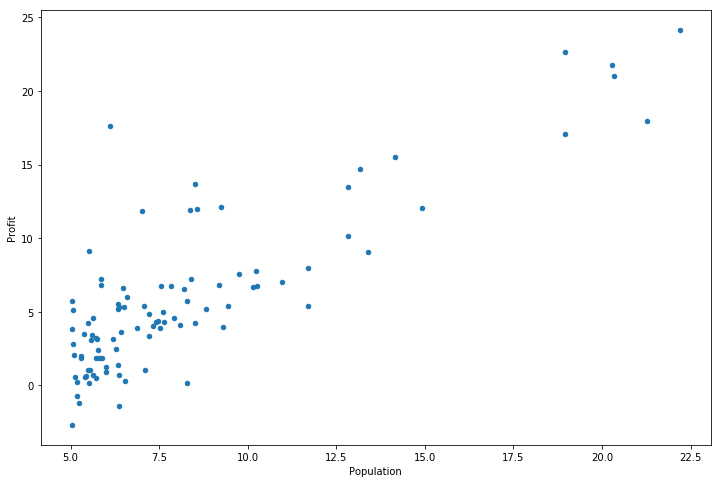

In [5]:
df.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [6]:
def computeCost(X, y, theta):
    inner = np.power(((X*theta.T) - y), 2)
    return np.sum(inner)/(2*len(X))

In [7]:
df.insert(0, 'Ones', 1)

In [8]:
cols = df.shape[1]
X = df.iloc[:, 0:cols-1]
y = df.iloc[:, cols-1:cols]

In [9]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))

In [10]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [11]:
computeCost(X, y, theta)

32.072733877455676

In [12]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X*theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - ((alpha/ len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [13]:
alpha = 0.01
iters = 1000
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [15]:
computeCost(X, y, g)

4.515955503078912

In [16]:
np.linspace?

In [18]:
x  = np.linspace(df.Population.min(), df.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

In [19]:
plt.subplots?

Text(0.5,1,'Predicted Profit vs. Population Size')

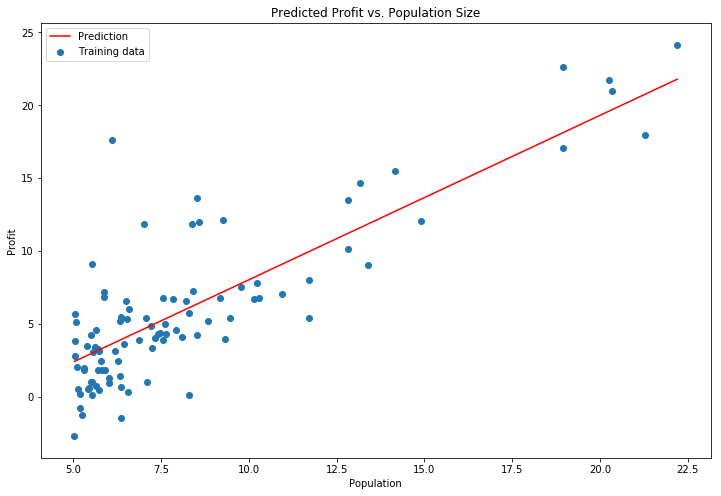

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.Population, df.Profit, label='Training data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5,1,'Error vs. Training Epoch')

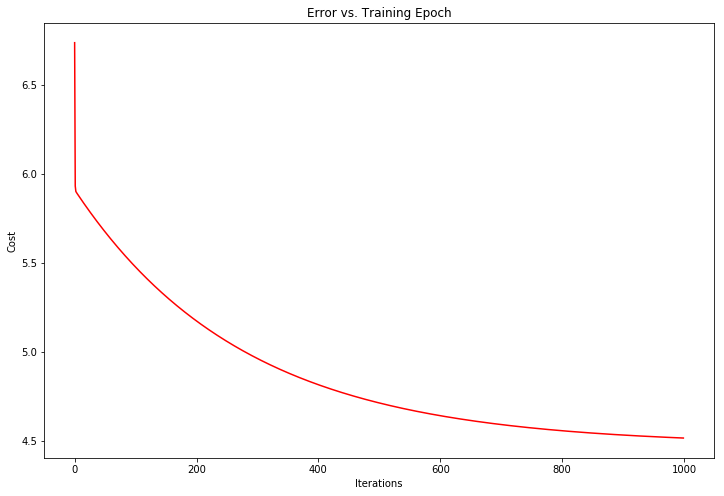

In [21]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  